# HELEN Results

This jupyter notebook summarises the results of the active appearance models which were trained using the *menpo* Python Package.  For more information regarding the training of these models please refer to:

1. Section 4 of the Review Paper
2. The Active Appearance Model base class contained within *aam.py*
3. The HELEN specific subclass of the base *helenAAM.py*
4. The holisitc AAM and patch AAM models described within *helen_aam_hol.py* and *helen_aam_patch.py*

This notebook will contained the cumulative error distribution curves produced by the models as well as a selection from literature.

-------------------------------------------------------------------------------------------------------------------------

## Resource Utilisation

| Model | Time (hh:mm:ss)   |  Avg # CPUs Used |  Memory Used (GB) |
|-------|-------------------|------------------|-------------------|
|  hAAM |     03:53:59      |       6.89       |        26.1       |
|  pAAM |     00:34:50      |       6.40       |        6.3        |
-------------------------------------------------------------------------------------------------------------------------
## Test Set

A brief description of the test set used during the experiment.  Note that the same test set was used for both holistic and patch experiments.

In [1]:
import os
with open('helen_aam_hol_testset.txt', 'r') as f:
    test_set_filenames = f.read().split('\n')

print("The test set comprised of %i images\n" % len(test_set_filenames))
print("Listing the first 10 images:")

# Print summary
test_set_filenames = [os.path.basename(filename) for filename in test_set_filenames]
print("\t".join(test_set_filenames[:10]) + "...")

The test set comprised of 330 images

Listing the first 10 images:
296814969_3.jpg	2968560214_1.jpg	2968784797_1.jpg	296961468_1.jpg	2970690152_2.jpg	2971848745_1.jpg	2973812451_1.jpg	2973812613_1.jpg	297461011_1.jpg	2975463532_1.jpg...


## Cumulative Error Distribution Curves

The following chart shows the normalised error distribution as produced by the holisitic and patch AAMs.  To our knowledge error distributions have not been reported solely for the HELEN dataset using the MULTIPIE-68 landmark configuration by [ibug](https://ibug.doc.ic.ac.uk/resources/facial-point-annotations/).

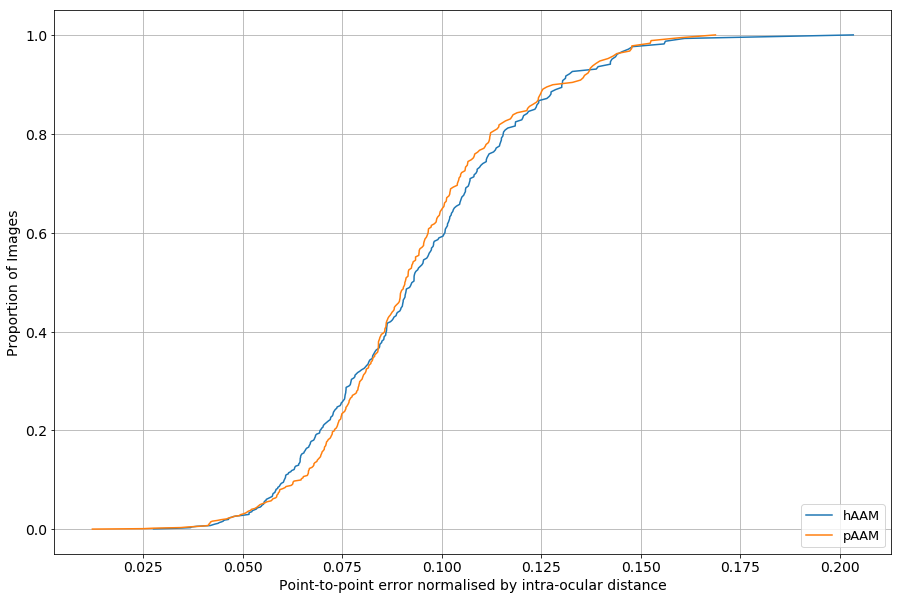

In [2]:
import numpy as np

# Import and configure matplotlib
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (15, 10)
matplotlib.rcParams['font.size'] = 14
import matplotlib.pyplot as plt


# These files contains the CED data from experimentation & literature
FILES = ['helen_aam_hol.npy', 'helen_aam_patch.npy']
LABELS = ['hAAM', 'pAAM']

for filename, label in zip(FILES, LABELS):
    
    # Load the data
    data = np.load(filename)
    
    # Normalise
    data[1] /= np.max(data[1])
    
    # Plot
    plt.plot(data[0], data[1], label=label)


# Add details to plot
plt.legend(loc='lower right', prop={'size': 13});
plt.grid();
plt.xlabel('Point-to-point error normalised by intra-ocular distance');
plt.ylabel('Proportion of Images');